# INFO 3350: Final Project 
# Discovering Unique Genres: Using Lyrical Analysis to Classify Songs


## 1. Introduction and hypothesis

Relatively recently, scholars have shifted their focus from traditional literature studies towards "digital humanities" as a method to to analyze literature through the lens of data. Machine learning methods have allowed scholars to engage with Moretti's concept of "distant reading," which is the process of “understanding literature not by studying particular texts, but by aggregating and analyzing massive amounts of data.” In contrast to the more traditional "close reading" method, where students may spend hours discussing an author's specific style or word choice in a particular sentence, "distant reading" instead looks at massive amounts of aggregagted data. Through this method, one can gain a broad understanding of incredibly large amounts of literature, and recognize patterns which may otherwise have not been visible.

Furthermore, many scholars have applied these methods specifically towards music. In Kenton Rambsy's #TheJayZMixtape, Rambsy analyzed Jay-Z's musical corpus to recognize patterns and trajectories across his 17+ year career. In Mauch et al.'s "The evolution of popular music: USA 1960–2010," Mauch and his team analyze musical audio features over time. Through analyzing such a wide amount of data, they found that while pop music has continously evolved, the transformations were particularly rapid during three stylistic ‘revolutions’ around 1964, 1983 and 1991. While Rambsy's analysis primarily focused on word usage and Mauch et. al's focused on musical audio features, both authors demonstrate how analyzing vast amounts of data can lead to the discovery of previously hidden patterns in music.

In my project, I aim to use data science techniques to discover which music genres are most "unique." Data scientists such as Nolan Foxworth have already started investigating differences between musical genres though "harmonic analysis." Additionally, Kaylin Pavlik has been able to classify different musical genres based on their audio features. Both researchers have shed light unto how genres can be differentiated based on how they sound. 

However, in my analysis I aim to turn towards differentiating musical genres based on their lyrics. Hopefully, I will be able classify songs from different genres based on these lyrics alone. My hypothesis is that among six genres - rap, pop, rock, r&b, edm, and latin - rap music will have the most unique lyrics and be easiest to classify, and pop will have the most general lyrics and will be harder to classify. While this hypothesis is primarily based on anecdotal experiences with each genre, I think pop will be the hardest to classify because it could encapsulate a wide range of songs, while 'rap' is a more specific label.

By analyzing their lyrics, I hope to discover which genres are harder and easier to classify, and which some of the most important lyrical features are. Overall, this project will shed light onto what musical genres are most lyrically unique. 

References: 
- Nathan Foxworth, "Musical Genre Identification and Differentiation of Rock, R&B/Hip-Hop, and Christian Songs Through Harmonic Analysis" https://firescholars.seu.edu/cgi/viewcontent.cgi?article=1072&context=honors
- Mauch et al., "The Evolution of Popular Music"
- Moretti, "Slaughterhouse of Literature"
- Kaylin Pavlik, "Understanding + classifying genres using Spotify audio features"https://www.kaylinpavlik.com/classifying-songs-genres/  
- Rambsy, #TheJayZMixtape


## 2. Data and methods

For my project, I used a dataset called "Audio features and lyrics of Spotify songs" from Kaggle. This dataset was initially created for this research project https://www.kaylinpavlik.com/classifying-songs-genres and only contained audio features and genres, scraped from pre-made Spotify playlists. A kaggle user added lyrics to the dataset using genius library in R and included the language of the lyrics using langdetect library in python. 

The finished corpus contained 18454 unique songs, with 25 columns of metadata including track name, artist, lyrics, and more. This corpus also includes all of the spotify audio features from the spotify API. While I did not use these audio features in my own research, they have proved interesting and useful in previous projects. More information about each audio feature can be found here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ . 

One consideration about this data I want to highlight is that the metadata is from Spotify playlists. Therefore, if a song was put on a "rock" playlist even if the artist would consider themselves a "pop" artist, our corpus will classify it as "rock." Given the size of the corpus, I am not especially concerned about these unique cases. However, it is worth nothing where our data comes from, and how that might affect it. 

When working with this data, I uploaded the Kaggle dataset csv into a pandas dataframe to more easily work with the corpus. For data cleaning methods, I only wanted to use songs written in english. I felt when classifying songs and comparing important features, making sure all the words are in the same language was the most pertinent step. After removing any song not written in English, I was left with 15405 songs. These are the songs I will be analyzing for the rest of the project.

For the rest of my project, I will be using a Tfid vectorizer to create a feature matrix. This vectorizer will allow me to transforms text of each song to feature vectors. In each vector the numbers (weights) represent each features tf-idf score. I used this vectorizer specifically becasue it allowed me to normalize the count of words among the songs, and play with the minimum and maximum amount of features that I wanted. I decided to keep stopwords among my features because I do think that different genres will make use of different stopwords, and the removal of stopwords can sometimes obscure interesting results. 

Using this vectorizer, I will also use Kmeans clustering for unsupervised analysis, and several differnt classifers for supervised classification. The combination of these methods will allow me to gain a wide range of information about my data. 


## 3. Results

In this section, I will walk through my code and how it relates to my research question. While time and scope contraints prohibited me from investigating everything I would have liked, I beleive my code succeeds in finding patterns in a large and robust corpus, and answering my research question about genre uniqueness. 

In [1]:
#imports 

import numpy as np
import os
from   sklearn.cluster import KMeans, SpectralClustering, DBSCAN, OPTICS, AgglomerativeClustering
from   sklearn.datasets import make_blobs
from   sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk
import pandas as pd
from collections import Counter
from nltk import word_tokenize
import string
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load corpus to pandas from csv
corpus_file = os.path.join('spotify_songs.csv')
corpus = pd.read_csv(corpus_file) 

In [3]:
print(corpus.shape)

(18454, 25)


In [4]:
#remove any songs not in English
corpus.drop(corpus[corpus['language'] != 'en'].index, inplace = True)

In [5]:
#remove some uneccesary metadata columns
corpus.drop(['track_id', 'track_album_id', 'playlist_id' ], axis=1)

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,urban contemporary,0.496,...,-6.157,1,0.0550,0.28000,0.000000,0.0975,0.305,147.764,224720,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,NAV,2017-02-24,PROJECT: Contemporary,r&b,urban contemporary,0.744,...,-6.103,1,0.3510,0.10100,0.000000,0.0919,0.340,154.962,179773,en
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,edm,progressive electro house,0.479,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,pop,electropop,0.963,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,r&b,neo soul,0.458,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en


In [6]:
#new working corpus shape
print(corpus.shape)

(15405, 25)


In [7]:
#all genres
genres = set([x for x in corpus['playlist_genre']])
genres

{'edm', 'latin', 'pop', 'r&b', 'rap', 'rock'}

In [8]:
#how many songs are in each genre ? Besides latin and edm, fairly even distribution
corpus.groupby(['playlist_genre']).size()

playlist_genre
edm      1758
latin     857
pop      3739
r&b      3161
rap      2502
rock     3388
dtype: int64

In [ ]:
corpus.groupby(['playlist_subgenre']).size()

Now that I have my corpus in order, I will now vectorize the 15,405 sets of song lyrics using a TfidVectorizer. 

In [10]:
# Vectorize all 15,405 songs by lyric

# Set up vectorizer
vectorizer = TfidfVectorizer(
    encoding='utf-8',
    min_df=10, #must appear in at least 10 songs
    max_df=.8, #no more than 80% frequency 
    binary=False,
    norm='l2',
    strip_accents = 'unicode',
    use_idf=True #length normalize
)

# Vectorize by song lyrics
X_lyrics = vectorizer.fit_transform(corpus['lyrics'])

# Get the dimensions of the doc-term matrix
print("Matrix shape:", X_lyrics.shape)

Matrix shape: (15405, 9003)


Here, I used TruncatedSVD to reduce my X_lyrics feature vector. This allowed me to plot all songs, color coded by genre. We can see now how the green points, pop songs, are most spread out across the plot. This suggests that pop songs cover a wide range of lyrical ground. By contrast, rap songs are by far the most distinct. Most of the rap songs are clustered together towards the bottom of the scatterplot, in purple. This suggets that rap songs have the most unique set of lyrics. This initial scatterplot confirms my hypothesis! 

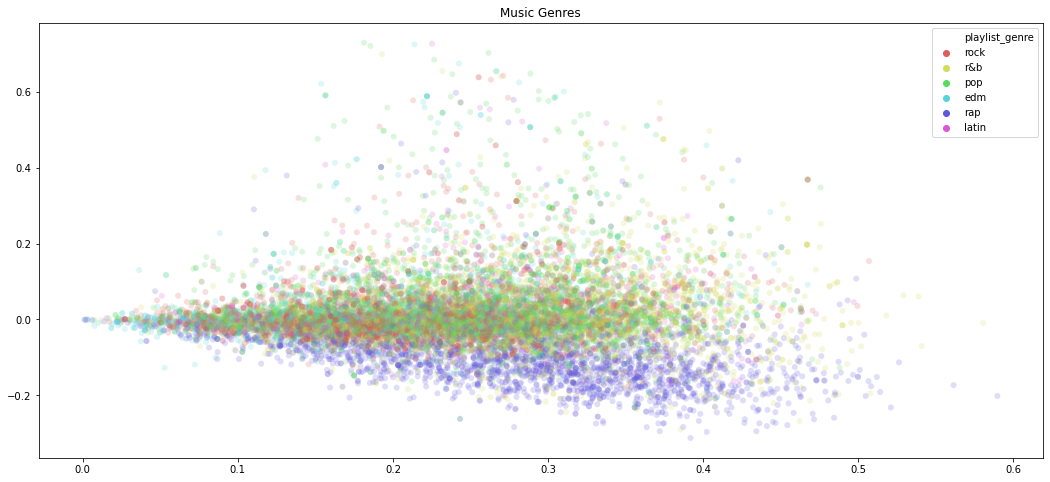

In [11]:
#reduce and plot
coords_lyrics = TruncatedSVD(n_components=2).fit_transform(X_lyrics)

plt.subplots(figsize=(18,8))
sns.scatterplot(
    x=coords_lyrics[:, 0], 
    y=coords_lyrics[:, 1],
    hue=corpus['playlist_genre'],
    alpha=0.2,
    linewidth=0,
    palette="hls"
)
plt.title('Music Genres, by lyrics')
plt.show()

Next, I ran an unsupervised K-Means clustering method to see if the computer could accurately create 6 clusters, one for each genre. Because the actual songs - besides rap - do not appear distinctly clustered, I was curious how the computer would classify each. 

In [12]:
# Plotting function
# Adapted from Professor Wilkens
def plot_compare(X, labels, title, reduce=True, alpha=0.2):
    '''
    Takes an array of object data, a set of cluster labels, and a title string
    Reduces dimensions to 2 and plots the clustering.
    Returns nothing.
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    from   sklearn.decomposition import TruncatedSVD

    if reduce:
        coordinates = TruncatedSVD(n_components=2).fit_transform(X)
    else:
        # Optionally handle 2-D inputs
        coordinates = X
    
    # Set up figure
    fig, ax = plt.subplots(figsize=(18,5))

    # Unlabeled data, by genre
    plt.subplot(121) # 1x2 plot, position 1
    sns.scatterplot(
        x = coordinates[:, 0], 
        y = coordinates[:, 1], 
        alpha=alpha, 
        hue=corpus['playlist_genre'],
        palette='hls',
        linewidths=0
    )
    plt.title("Unclustered data, by lyric")

    # Labeled data
    plt.subplot(122)
    sns.scatterplot(
        x=coordinates[:, 0], 
        y=coordinates[:, 1],
        hue=labels,
        alpha=alpha,
        palette='Set2',
        legend = 'full',
        linewidth=0
    )
    plt.title(title)
    plt.show()

In [15]:
# Perform k-Means clustering with n_clusters = 6
y_kmeans = KMeans(n_clusters=6).fit_predict(X_lyrics) # Perform clustering

The results of the KMeans clustering method are not what I expected would happen. We can see how categiry 3, in pink, closely resembles the 'rap' songs in the unclustered data. However, many of the other clusters are not obviously matched up with a specific genre on the left. This again implies that while other clusters of music by lyrics exist, rap continues to be one of the most unique and obvious. However, I was surprised at how disorganized the other clusters seem. 

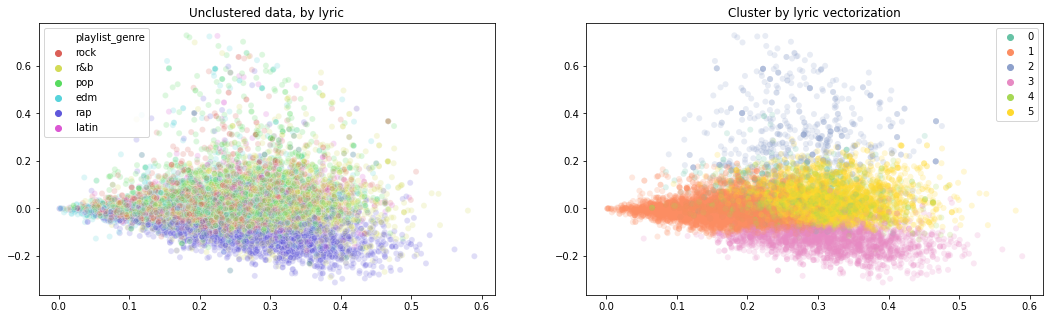

In [16]:
plot_compare(X_lyrics, y_kmeans, 'Cluster by lyric vectorization')

Moving forward, I engaged with supervised classification methods. First, I wanted to see how a standard Logistic Regression classifier would fare in classifying all 6 genres against each other. If it randomly guessed, it would have roughly a 1 in 6, or 17% chance, of getting the genres correct. I was curious how much better it could classify!

In [14]:
#Classify one vs. all 

#standard scale our feature matrix

X_lyrics = StandardScaler().fit_transform(X_lyrics.toarray())
print("Matrix shape:", X_lyrics.shape)
print("Mean: " + str(np.mean(X_lyrics)))

Matrix shape: (15405, 9003)
Mean: -2.354955406751368e-18


In [16]:
y_genres = corpus['playlist_genre']

In [17]:
#classify 
X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_genres, test_size=0.30, random_state=42)
clf = LogisticRegression(max_iter=5000).fit(X_train, y_train)
clf.predict(X_test)

array(['rock', 'rap', 'rock', ..., 'edm', 'rock', 'rock'], dtype=object)

In [18]:
clf.score(X_test, y_test)

0.47728256166161837

The initial classifier score was about 48%, which is significantly higher than a random guess! This made me optimistic about how lyrically distinct these genres really were from each other. 

Next, I wanted to use a confusion matrix to discover which genres had the strongest classification scores. This would imply that they had the most unique lyrics, making it easiest to classify. A confusion matrix will also show which genres were incorrectly classified, or "confused," for others. This will provide insight into which genres might share more lyrical features.

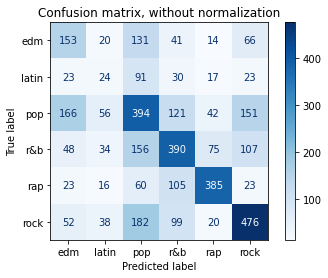

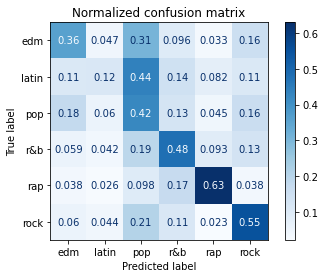

In [25]:
# Confusion Matrix
# code adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 

from sklearn.metrics import plot_confusion_matrix
#labels  {'edm', 'latin', 'pop', 'r&b', 'rap', 'rock'}
genre_list = [set(corpus['playlist_genre'])]

X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_genres, random_state=0)

#run classifier
classifier = LogisticRegression(max_iter=5000).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()


Analyzing the confusion matrix showed interesting results. Out of all the genres, rap had the highest normalized score, meaning it had the highest classification accuracy. This supports my hypothesis that rap was most distinct ouf of the other genres! It was followed by rock, r&b, pop, edm, and latin. 

The results were also intersting to see which songs were confused for which. Based on the graph, it seems like rap was most often confused for r&b. This makes sense given the historical links between the two genres. Additionally, rock was most confused for pop. This also makes sense to me, since rock and pop are both broad categories which could cover a wide range of songs. Interestingly, latin was most confused for pop music. This is surprising, since I would have expected latin music to be more distinct, since it probably uses different phrases specific to latin-speaking people or countries. Also, its classification score is extremely low... this may be becasuse latin was the smallesst genre in the corpus. Therefore, the training set may not have had enough latin data to accurately train on. 

Next, I wanted to analyze some features. By classify rap and pop music against the rest of the corpus (a one vs. all approach), I hoped to learn which features were most important for each genre. Ideally I wanted to do this for each genre, but the size of my feature matrix prevented me from being able to run this code more times (as it was extremely slow). Because my original hypothesis predicted rap and pop would be the most and least unique, looking at these two genres seemed pertinent.

In [43]:
# Adapted from Professor Wilkens
# will use this later 
def print_importances(importance_object, feature_names):
    '''
    Takes a trained permutation_importance object and a list of feature names.
    Prints an ordered list of features by descending importance.
    '''
    dict = {}
    for i in importance_object.importances_mean.argsort()[::-1]:
        dict[feature_names[i]] = (importance_object.importances_mean[i], importance_object.importances_std[i])
    return dict 

In [12]:
#Classify rap vs. all

#create rap y_labels
y_rap = []
for genre in corpus['playlist_genre']:
    if genre == 'rap':
        y_rap.append(1)
    else:
        y_rap.append(0)

#total songs
print(len(y_rap))
#naive baseline classifier if picked randomly 
print(sum(y_rap)/len(y_rap))


15405
0.16241480038948394


In [14]:
#select best 100 rap features 
X_best_rap = SelectKBest(mutual_info_regression, k=100).fit_transform(X_lyrics, y_rap)

In [31]:
X_best_rap.shape

(15405, 100)

In [63]:
# Classify with all features, just to compare
X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_rap, test_size=.25, train_size=.75)
logit = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(logit.score(X_test, y_test))

0.8982346832814122


In [17]:
# Classify best, for rap 
# performs only slighty worse than using all 9000 features! 
X_train, X_test, y_train, y_test = train_test_split(X_best_rap, y_rap, test_size=.25, train_size=.75)
logit = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(logit.score(X_test, y_test))

#most important obejct
most_important = permutation_importance(logit, X_train, y_train, random_state=0)
print('done')

0.8966770508826584
done


In [34]:
X_support = SelectKBest(mutual_info_regression, k=100).fit(X_lyrics, y_rap).get_support()

In [35]:
indices = []

for i in range(len(X_support)):
  if X_support[i]==True:
    indices.append(i)

top_features = vectorizer.get_feature_names()

words = []
for i in indices:
  words.append(top_features[i])



In [45]:
rap_dict = print_importances(most_important, words)
rap_dict

{'ma': (0.0035488617675062837, 0.0007262590483304018),
 'love': (0.0032026313511642314, 0.0005793542986473486),
 'around': (0.00259672812256555, 0.0004645168480913601),
 'oh': (0.0025794166017484967, 0.0003163795876828081),
 'that': (0.002492858997662939, 0.0002590951189664209),
 'on': (0.0023024322686748143, 0.000472829577901771),
 'bitch': (0.0018523327274301282, 0.00035308712982549153),
 'got': (0.0017138405608932762, 0.00021483032365602817),
 'if': (0.0015061023110880313, 0.00044339127412328723),
 'right': (0.0013502986237341253, 0.00022304334331733132),
 'ain': (0.0013156755820998844, 0.00037689848623002914),
 'nigga': (0.0011598718947459564, 0.0002484670664659862),
 'some': (0.0010040682073920281, 0.0003125676462437238),
 'big': (0.00098675668657493, 0.0002544263560408249),
 'like': (0.000934822124123591, 0.0002968307487143044),
 'hoes': (0.0008828875616723186, 0.0002704145997024645),
 'he': (0.0008482645200381001, 0.00014891933293590466),
 'for': (0.0008136414784039037, 0.000103

When looking at the top ten most important features from rap classifcation, I was surprised to discover that they did not seem ~that~ unique. The top ten most important words were: 'ma','love', 'around', 'oh', 'that','on', 'bitch', 'got', 'if', 'right'. Interestingly, many of these words are quite narrative, like they would be used to tell a story-- especially the prepositions "on" "around". Based on these words, I was even more curious to why rap was so distinct, and how they compared to the top words from pop song classification. 

In [38]:
#do everything again, with pop genres
# create pop y_labels
y_pop = []
for genre in corpus['playlist_genre']:
    if genre == 'pop':
        y_pop.append(1)
    else:
        y_pop.append(0)

#total songs
print(len(y_pop))
#naive baseline classifier if picked randomly 
print(sum(y_pop)/len(y_pop))

X_support_pop = SelectKBest(mutual_info_regression, k=100).fit(X_lyrics, y_pop).get_support()

15405
0.2427134047387212


In [39]:
# Classify best, for pop
# much lower classification score than rap, by about 15%. 
X_best_pop = SelectKBest(mutual_info_regression, k=100).fit_transform(X_lyrics, y_pop)

X_train, X_test, y_train, y_test = train_test_split(X_best_rap, y_pop, test_size=.25, train_size=.75)
logit = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(logit.score(X_test, y_test))

most_important_pop = permutation_importance(logit, X_train, y_train, random_state=0)
print('done')

0.7546728971962616
done


In [44]:
pop_dict = print_importances(most_important_pop, words)
pop_dict

{'this': (0.001281052540465666, 0.0006416949015095849),
 'broke': (0.0010906258114775635, 0.0006011860245541762),
 'like': (0.0006751493118670515, 0.0003436238767641457),
 'if': (0.0005712801869644402, 0.000282342360084843),
 'he': (0.0005020341036960252, 0.0003924793230764016),
 'them': (0.0004674110620618066, 0.00030282793533344685),
 'we': (0.0004500995412447306, 0.00047535809634713974),
 'tryna': (0.0003981649787933916, 8.827178245638188e-05),
 'dope': (0.00036354193715921747, 0.00016784142153263343),
 'that': (0.00034623041634207485, 9.481910456244944e-05),
 'hate': (0.00032891889552499887, 0.00020773824980525416),
 'put': (0.00032891889552497664, 0.000167841421532638),
 'when': (0.00032891889552497664, 0.0004147545590136086),
 'make': (0.00032891889552497664, 0.000167841421532638),
 'yo': (0.0003116073747078785, 0.00028760058384548855),
 'damn': (0.0003116073747078785, 0.00016054043963466055),
 'off': (0.0002942958538907581, 0.00012954755948320823),
 'was': (0.0002942958538907581

The most importnat features for pop songs were really interesting. The top words were 'this', 'broke','like','if', 'he', 'them','we','tryna','dope', and 'that.' The first thing I noticed about these top words was that there were pronouns, such as 'he,' 'them,' and 'we.' This differed from the rap songs. Additionally, many of the words spoke about groups of people compared to individuals.

Also, the classifiers between rap and pop differed by about 15%. This shows that rap is significantly easier to classify than pop. 

Next, I wanted to look towards a one vs. all classification method. While the first classifier did a relatively good job choosing one of 6 genres, I wanted to see which genre would have the highest classification score. This would tell us which genres are easiest and hardest to classify against the rest of the corpus, implying which had the most distint lyrics. 

Here, I tested the classification scores for each genre against the rest of the corpus in a binary classification, for Logistic Regression Classifier, a Random Forest Classifier, and a Decision Tree Classifier. If the top classification scores were fairly consistent between classifiers, it would make me more confident that those genres were actually the most unique across the board. 

In [28]:
# which genres are hardest to classify?
# one vs. all classification

print("Matrix shape:", X_lyrics.shape)
print("Mean: " + str(np.mean(X_lyrics)))

all_results_dict = {}

# getting information for each genre 
for genre in genre_list:
    # make gold labels 
    # everything that is not that particular genre is a 0 
    y_labels = []
    for song_genre in corpus['playlist_genre']:
        if song_genre == genre:
            y_labels.append(1)
        else:
            y_labels.append(0)
    #train a logistic classifier on the lyrics and genre labels, 75%/25% train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_labels, test_size=.25, train_size=.75)
    logit = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    #gather most important features, for each genre, for classification
    #most_important = permutation_importance(logit, X_train, y_train, random_state=0)
    
    #store results for each genre in a dictionary
    # genre, genre count in corpus, naive baseline classifier, classification score, important features
    all_results_dict[genre] = [genre, sum(y_labels), sum(y_labels)/len(y_labels), logit.score(X_test, y_test)]
    print(genre)

all_results_dict

Matrix shape: (15405, 9003)
Mean: -2.354955406751368e-18
pop
rap
rock
edm
latin
r&b


{'pop': ['pop', 3739, 0.2427134047387212, 0.6835410176531672],
 'rap': ['rap', 2502, 0.16241480038948394, 0.8886292834890965],
 'rock': ['rock', 3388, 0.21992859461213893, 0.8014018691588785],
 'edm': ['edm', 1758, 0.11411879259980526, 0.8452751817237798],
 'latin': ['latin', 857, 0.05563128854268095, 0.907061266874351],
 'r&b': ['r&b', 3161, 0.20519311911716975, 0.7637590861889927]}

In [30]:
#turn results into dict
results = pd.DataFrame.from_dict(all_results_dict, orient='index',
                       columns=['genre', 'genre_count', 'naive baseline', 'classification score']) 
results

,genre,genre_count,naive baseline,classification score
pop,pop,3739,0.242713,0.683541
rap,rap,2502,0.162415,0.888629
rock,rock,3388,0.219929,0.801402
edm,edm,1758,0.114119,0.845275
latin,latin,857,0.055631,0.907061
r&b,r&b,3161,0.205193,0.763759


Based on these classification scores, the genre with the highest classificaiton score was surprisingly latin music. This went against my hypothesis, and the data we saw from the unsupervised clustering. It is notable that latin had the lowest naive baseline classification score (since there were fewest latin songs in the corpus), but highest Logistic classification score. This demonstrates that it is significantly easier to classify latin music than other genres. 

Additionally, pop music had the highest naive baseline score but lowest classification score. This supports part of my hypothesis, and what we saw in the scatterplot, which both suggest that pop music has the least distinct lyrical make up. 

It is notable that even though I removed all non english songs from the corpus, the classifier still performed best on latin music. Had I kept non-enlish songs, I would have not been as surprised. But, this suggests than even when latin songs are all in the same language, there is something unique about them. Additionally, after latin, rap had the highest score with 88%. This suggests that even though latin may be easier to classify and "more unique," rap is the next most unique genre. 

In [36]:
# one vs. all classification

print("Matrix shape:", X_lyrics.shape)
print("Mean: " + str(np.mean(X_lyrics)))

random_results_dict = {}

# getting information for each genre 
for genre in genre_list:
    # make gold labels 
    # everything that is not that particular genre is a 0 
    y_labels = []
    for song_genre in corpus['playlist_genre']:
        if song_genre == genre:
            y_labels.append(1)
        else:
            y_labels.append(0)
    #train a logistic classifier on the lyrics and genre labels, 75%/25% train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_labels, test_size=.25, train_size=.75)
    random = RandomForestClassifier().fit(X_train, y_train)
    #gather most important features, for each genre, for classification
    #most_important = permutation_importance(logit, X_train, y_train, random_state=0)
    
    #store results for each genre in a dictionary
    # genre, genre count in corpus, naive baseline classifier, classification score, important features
    random_results_dict[genre] = [genre, sum(y_labels), sum(y_labels)/len(y_labels), random.score(X_test, y_test)]

random_results_dict

Matrix shape: (15405, 9003)
Mean: -2.354955406751368e-18


{'pop': ['pop', 3739, 0.2427134047387212, 0.7645379023883697],
 'rap': ['rap', 2502, 0.16241480038948394, 0.9044652128764278],
 'rock': ['rock', 3388, 0.21992859461213893, 0.8317757009345794],
 'edm': ['edm', 1758, 0.11411879259980526, 0.8935617860851506],
 'latin': ['latin', 857, 0.05563128854268095, 0.940809968847352],
 'r&b': ['r&b', 3161, 0.20519311911716975, 0.8302180685358256]}

These results correspond to the results from the logistic classifier, however the scores across the board were higher. Here, latin music had an excellent classification score with 94%. This is the highest, and is followed by rap, with 90%. Pop music remains the lowest socore, with 76%. 

In [37]:
# one vs. all classification

print("Matrix shape:", X_lyrics.shape)
print("Mean: " + str(np.mean(X_lyrics)))

decision_results_dict = {}

# getting information for each genre 
for genre in genre_list:
    # make gold labels 
    # everything that is not that particular genre is a 0 
    y_labels = []
    for song_genre in corpus['playlist_genre']:
        if song_genre == genre:
            y_labels.append(1)
        else:
            y_labels.append(0)
    #train a logistic classifier on the lyrics and genre labels, 75%/25% train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_labels, test_size=.25, train_size=.75)
    decision = DecisionTreeClassifier(splitter='best').fit(X_train, y_train)
    #gather most important features, for each genre, for classification
    #most_important = permutation_importance(logit, X_train, y_train, random_state=0)
    
    #store results for each genre in a dictionary
    # genre, genre count in corpus, naive baseline classifier, classification score, important features
    decision_results_dict[genre] = [genre, sum(y_labels), sum(y_labels)/len(y_labels), decision.score(X_test, y_test)]

decision_results_dict

Matrix shape: (15405, 9003)
Mean: -2.354955406751368e-18


{'pop': ['pop', 3739, 0.2427134047387212, 0.6998961578400831],
 'rap': ['rap', 2502, 0.16241480038948394, 0.8808411214953271],
 'rock': ['rock', 3388, 0.21992859461213893, 0.7866043613707165],
 'edm': ['edm', 1758, 0.11411879259980526, 0.84865005192108],
 'latin': ['latin', 857, 0.05563128854268095, 0.9153686396677051],
 'r&b': ['r&b', 3161, 0.20519311911716975, 0.7840083073727934]}

Analyzing the decision tree results also corresponds to previous classifier performance. Latin had the highest score, followed by rap. Pop had the lowest score. 

Overall, these results suggest that while I initially predicted rap to be the most distinct genre, it was actually latin! This is especially noteworthy considering latin was the smallest represented genre in the corpus. Additionally, even though pop was the largest category of songs among the corpus, it still was hardest to classify. This supports my hypothesis that pop music would have the least distinct, hardest to classify lyrics. 

## 4. Discussion and conclusions

Overall, my analyses demonstrated intersting results about differences about musical genres. When analyzing vectorized music lyrics from 6 genres, it seems that latin music has the most unique lyrics, and pop has the least unique lyrics. After latin, rap music was most distinct.  

To recap, first, I wanted to use unsupervised data science methods to analyze the musical lyrics. After running a K-means cluster, it seemed clear that rap music has the most unique word usage. While the other five genres were fairly intertwined, rap songs had distict vectorization. The cluster picked up on that. Of the 6 clusters, the K-means method was able to create a cluster for rap music which matched up to the actual cluster. 

Next, I moved towards supervised classification methods. First, I wanted to see how accurately a Logistic Regression classifier could classify a song for one of 6 genres. Surprisingly, classifying musical genres by word usage works fairly well. While a naive genre classification would yield results of about 1 in 6, or 17%, my classifier was able to predict musical genre by lyrics with an accuracy of about 47%. 

Then, I looked at a confusion matrix. This also suggested that among 6 genres, rap music was easiest  to classify, and latin was the hardest. The matrix also showed us which genres are likely to be confused for each other; for example, when rap wasn't correctly classified it was relativley often classified as r&b. 

After looking at the confusion matrix, I analyzed the top most important 100 features from pop and rap music. While some features overlapped, most of the top ten were different between the two genres. Analyzing these features was interesting; to me, it seemed like rap songs were more personal, narrative stories about the singers themselves, while pop songs sang more about groups of people using words like "we" and "them." 

Finally, using one vs. all classification methods with three different classifiers, it turned out that latin was the most accurate classification! This suggests that when taking a binary approach, latin is most distinct from the five other genres. Additionally, pop had the lowest classification accuracy scores across the board. This confirms my hypothesis that pop music may have least unique or distinct lyrics. 

Overall, this project was very interesting. I will now think of all these genres, and how they relate to each other, differently! 

Given another similar experiment in the future, I would want to engage with more advanced methods to discover more about these genres. For example, in my corpus I did not have equal number of songs for each genre. In further experiments I would like to use "data augmentation" methods to create a more even, representative corpus. Hopefully, this would improve the multi-class classification of genres such as latin and EDM, which had smaller representation in the corpus.

Additionally, there has been excellent research analyzing musical audio features. While my analysis focused only on lyrics, I am curious how both audio features and lyrics could be combined to paint a cohesive image of differences in genres. For example, it would be really intersting to learn that two musical genres had very similar lyrics, but completely different audio features (or vice versa). I think this research would fit well into other mappings of musical evolution over time, such as Mauch et al.'s piece, or more casual data visualization projects such as https://musicmap.info/. 

Additionally, in this project I only analyzed one of 6 genres. However, each genre category had several other subgenre categories. While I think it would be extremely hard for a classifier to accurately classify a song as one of so many subgenres, I hope in the future researchers continue analyzing these differences and discovering what exactly makes a subgenre "unique" from others. 

There is a wealth of this data available, and the ubiquity of music recommendation apps such as spotify means there is increased demand to understand what makes people like what they like. Analyzing music through the lens of "digital humanities" can lead to important discoveries about our listening habits, and can shed light unto the similarities and differences between genres.

Thanks for reading! 